# Unit 5 - Financial Planning


In [31]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [32]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [33]:
# Set current amount of crypto assets
# YOUR CODE HERE!

my_btc = 1.2
my_eth = 5.3

In [34]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [35]:
import json

In [36]:
# Fetch current BTC price
# YOUR CODE HERE!

requests.get(btc_url)
btc_price_request = requests.get(btc_url)
btc_price_response = btc_price_request.json()
print(json.dumps(btc_price_response, indent=4))

my_btc_value = btc_price_response['data']['1']['quotes']['USD']['price']
print(my_btc_value)


# Fetch current ETH price
# YOUR CODE HERE!]
requests.get(eth_url)
eth_price_request = requests.get(eth_url)
eth_price_response = eth_price_request.json()
print(json.dumps(eth_price_response, indent=4))

my_eth_value = eth_price_response['data']['1027']['quotes']['USD']['price']
print(my_eth_value)


# Compute current value of my crpto
# YOUR CODE HERE!
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
# Print current crypto wallet balance
crypto_wallet_value = (my_eth_value * my_eth) + (my_btc_value * my_btc)
print(f"My crypto wallet is worth: ${crypto_wallet_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18711975,
            "total_supply": 18711975,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 44494.0,
                    "volume_24h": 69799721705,
                    "market_cap": 832577438820,
                    "percentage_change_1h": -1.18678536020858,
                    "percentage_change_24h": -7.99852343932937,
                    "percentage_change_7d": -23.5674906767927,
                    "percent_change_1h": -1.18678536020858,
                    "percent_change_24h": -7.99852343932937,
                    "percent_change_7d": -23.5674906767927
                },
                "CAD": {
                    "price": 53957.8738,
                    "volume_24h": 84646122511.6535,
                   

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [37]:
# Current amount of shares
# YOUR CODE HERE!
my_agg = 200
my_spy = 50


In [38]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("alpaca_api_key")
alpaca_secret_key = os.getenv("alpaca_secret_key")
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [39]:
# Format current date as ISO format
# YOUR CODE HERE!
start_date = pd.Timestamp("2020/05/13", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-13", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
stock_price = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df


# Preview DataFrame
# YOUR CODE HERE!
stock_price.head()

AGG                                       \
                             open      high     low    close    volume   
time                                                                     
2020-05-13 00:00:00-04:00  116.63  116.7600  116.45  116.600   8313730   
2020-05-14 00:00:00-04:00  116.91  116.9700  116.72  116.940  10771434   
2020-05-15 00:00:00-04:00  117.04  117.0900  116.90  117.030  11003154   
2020-05-18 00:00:00-04:00  116.97  117.0900  116.66  116.840   9357286   
2020-05-19 00:00:00-04:00  116.91  117.0255  116.81  116.975   7485700   

                              SPY                                        
                             open     high      low    close     volume  
time                                                                     
2020-05-13 00:00:00-04:00  286.06  287.190  278.965  281.670  125466121  
2020-05-14 00:00:00-04:00  278.95  285.110  272.990  285.050  110106023  
2020-05-15 00:00:00-04:00  282.37  286.330  281.340  286.260   91154055  
2020-05-18 00:00:00-04:00  293.05  296.750  292.700  294.995  100556561  
2020-05-19 00:00:00-04:00  294.35  296.205  291.950  292.020   78858186

In [40]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = stock_price["AGG"]["close"][0]
spy_close_price = stock_price["SPY"]["close"][0]


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.6
Current SPY closing price: $281.67


In [41]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = (spy_close_price * my_spy)
my_agg_value = (agg_close_price * my_agg)
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $14083.50
The current value of your 200 AGG shares is $23320.00


### Savings Health Analysis

In [42]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Create savings DataFrame
# YOUR CODE HERE!
savings = [
    (my_eth_value + my_btc_value),
    (my_agg_value + my_spy_value)
]

df_savings = pd.DataFrame(savings, index=["crypto", "shares"], columns= ["amount"])
# Display savings DataFrame
df_savings.head()

,amount
crypto,47877.37
shares,37403.50


<AxesSubplot:ylabel='amount'>

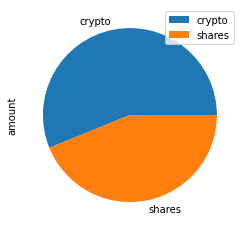

In [43]:
# Plot savings pie chart
# YOUR CODE HERE!

df_savings.plot.pie(y="amount")

In [44]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = (my_btc_value + my_eth_value + my_spy_value + my_agg_value)
# Validate saving health
# YOUR CODE HERE! 
#use if and else statements to print wether there is enough money( check readme)
if total_savings > emergency_fund:
    print("Congrats you have more money than whats in your emergency fund!")
elif total_savings == emergency_fund:
    print("Congrats on meeting your savings goal!")
else:
    print(f"You need ${emergency_fund - total_savings} more till your goal!")


Congrats you have more money than whats in your emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [45]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-13', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-13', tz='America/New_York').isoformat()

In [46]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df
# Display sample data
df_stock_data.head()

AGG                                        \
                             open    high       low    close     volume   
time                                                                      
2017-05-23 00:00:00-04:00  109.50  109.53  109.2100  109.240  1194872.0   
2017-05-24 00:00:00-04:00  109.25  109.50  109.2115  109.450  2325960.0   
2017-05-25 00:00:00-04:00  109.45  109.49  109.3701  109.460  1382257.0   
2017-05-26 00:00:00-04:00  109.46  109.54  109.4400  109.480   853245.0   
2017-05-30 00:00:00-04:00  109.58  109.66  109.5400  109.635  1199625.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2017-05-23 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2017-05-24 00:00:00-04:00  240.32  240.73  239.93  240.59  37423590.0  
2017-05-25 00:00:00-04:00  241.20  242.08  240.96  241.71  45278321.0  
2017-05-26 00:00:00-04:00  241.55  241.90  241.45  241.74  30002081.0  
2017-05-30 00:00:00-04:00  241.33  241.79  241.16  241.52  28437351.0

In [47]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [48]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_30_year.portfolio_data.head()

AGG                                        \
                             open    high       low    close     volume   
time                                                                      
2017-05-23 00:00:00-04:00  109.50  109.53  109.2100  109.240  1194872.0   
2017-05-24 00:00:00-04:00  109.25  109.50  109.2115  109.450  2325960.0   
2017-05-25 00:00:00-04:00  109.45  109.49  109.3701  109.460  1382257.0   
2017-05-26 00:00:00-04:00  109.46  109.54  109.4400  109.480   853245.0   
2017-05-30 00:00:00-04:00  109.58  109.66  109.5400  109.635  1199625.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-05-23 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-05-24 00:00:00-04:00     0.001922  240.32  240.73  239.93  240.59   
2017-05-25 00:00:00-04:00     0.000091  241.20  242.08  240.96  241.71   
2017-05-26 00:00:00-04:00     0.000183  241.55  241.90  241.45  241.74   
2017-05-30 00:00:00-04:00     0.001416  241.33  241.79  241.16  241.52   

                                                    
                               volume daily_return  
time                                                
2017-05-23 00:00:00-04:00         NaN          NaN  
2017-05-24 00:00:00-04:00  37423590.0          NaN  
2017-05-25 00:00:00-04:00  45278321.0     0.004655  
2017-05-26 00:00:00-04:00  30002081.0     0.000124  
2017-05-30 00:00:00-04:00  28437351.0    -0.000910

In [49]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995716,1.006814,0.979712,0.993734,1.002218,0.996512,1.005640,0.987206,0.994166,1.002424,...,0.988355,1.006783,1.010405,0.998364,1.011899,0.998353,0.999567,0.999845,1.010746,0.997342
2,0.996214,1.021471,0.980061,0.990918,1.006910,0.995376,1.010553,0.996637,0.995443,1.002908,...,0.987453,1.012232,1.020422,0.999763,1.004800,0.990557,0.981426,0.989958,1.017319,1.005313
3,0.985667,1.024626,0.990269,0.979528,1.003448,0.996819,1.014257,0.992474,0.997900,1.002481,...,0.991682,1.019014,1.026535,1.013190,1.010341,0.990176,0.981341,1.000264,1.018541,1.019713
4,0.999674,1.017854,0.978416,0.967726,1.009063,0.995121,1.026558,1.004904,0.998273,1.005061,...,0.983522,1.013223,1.015348,1.027618,1.017981,0.989037,0.978530,1.000734,1.013716,1.020798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,12.422634,10.780078,18.936461,17.740511,50.490157,5.904749,40.956615,8.414818,20.241255,30.669674,...,27.815015,11.637709,19.093980,10.813421,6.676104,10.088348,21.556690,17.643053,6.450604,39.878642
7557,12.430260,10.763305,19.033853,17.607919,50.333142,5.784988,41.390423,8.354354,20.215145,30.701252,...,27.581963,11.658277,18.974799,10.758662,6.683691,10.054883,21.635515,17.515825,6.454954,39.978109
7558,12.408677,10.750806,19.000052,17.638536,50.677796,5.816202,41.265798,8.302408,20.192420,30.790098,...,27.593623,11.635575,18.827927,10.769008,6.620612,10.167123,21.776393,17.753912,6.469597,40.151107
7559,12.526548,10.835162,18.929518,17.584518,50.238347,5.837097,41.466022,8.267287,20.159201,30.315725,...,27.567268,11.624615,18.817215,10.656410,6.505097,10.222104,21.893878,17.917354,6.498677,40.028123


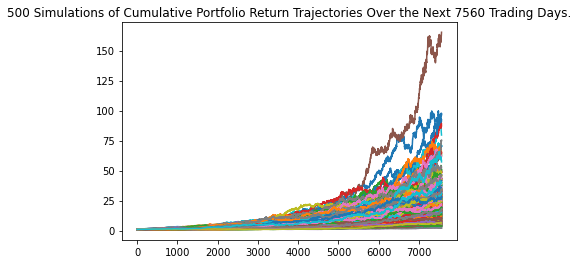

In [55]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_30_year_plot = MC_30_year.plot_simulation()
MC_30_year_plot.get_figure().savefig("MCfor30years", bbox_inches="tight")

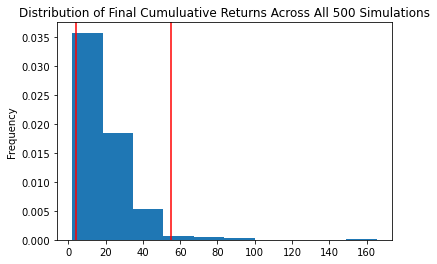

In [56]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

MC_30_year_dist = MC_30_year.plot_distribution()
MC_30_year_dist.get_figure().savefig("distof30yearMC", bbox_inches='tight')


### Retirement Analysis

In [57]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
MC_30_year_stats = MC_30_year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(MC_30_year_stats)

count           500.000000
mean             19.597992
std              15.099449
min               2.023287
25%              10.377997
50%              16.058830
75%              24.013197
max             165.347337
95% CI Lower      4.202656
95% CI Upper     55.193472
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [58]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

ci_lower = round(MC_30_year_stats[8]*initial_investment,2)
ci_upper = round(MC_30_year_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $84053.12 and $1103869.43


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [59]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

ci_lower = round(MC_30_year_stats[8]*initial_investment,2)
ci_upper = round(MC_30_year_stats[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $126079.68 and $1655804.15


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")